# Car Price Prediction with Machine Learning

## Objective
The primary objective of this project is to develop a machine learning model for predicting car prices. The project aims to explore the various factors influencing car prices, such as brand goodwill, car features, horsepower, and mileage. Participants will gain insights into the research area of car price prediction and learn the process of training a machine learning model for this task.

## Description
Car price prediction is a crucial aspect of machine learning research, considering the multitude of factors that impact the pricing of a vehicle. This project delves into understanding and implementing a model that takes into account variables like brand reputation, car features, horsepower, and mileage to predict car prices. Participants will have the opportunity to enhance their skills in training machine learning models while gaining valuable insights into the automotive indstry.
.


In [1]:
# Ignore Python Script warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r'D:\GitHUb\OIBSIP\Data_Science\DataSheet\cardata.csv')
df_head = df.head(21)
# Apply a style to format the display
styled_df = df_head.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightgrey')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid black')]},
])
styled_df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.350000,5.590000,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750000,9.540000,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250000,9.850000,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850000,4.150000,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600000,6.870000,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.250000,9.830000,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.750000,8.120000,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.500000,8.610000,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.750000,8.890000,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.450000,8.920000,42367,Diesel,Dealer,Manual,0


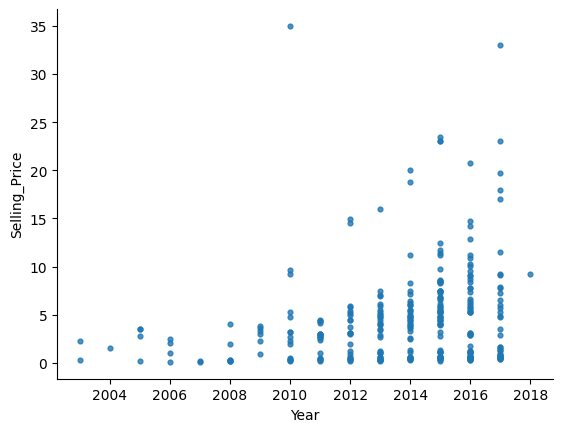

In [4]:
df.plot(kind='scatter', x='Year', y='Selling_Price', s=12, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df_describe = df.describe()
# Apply a style to format the display
styled2_df = df_describe.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightgrey')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid black')]},
])
styled2_df

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

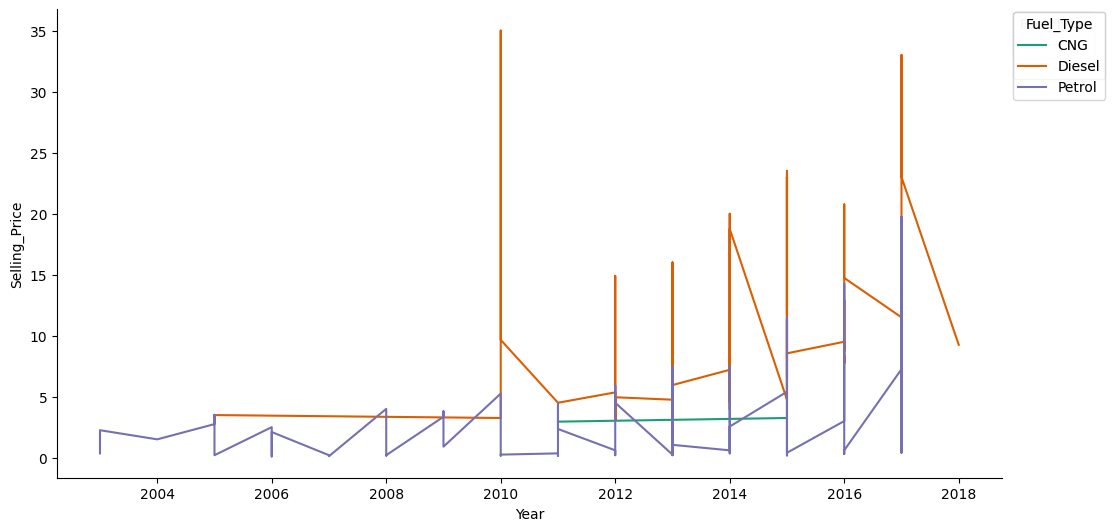

In [9]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Selling_Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Fuel_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Fuel_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
fr_ = plt.ylabel('Selling_Price')

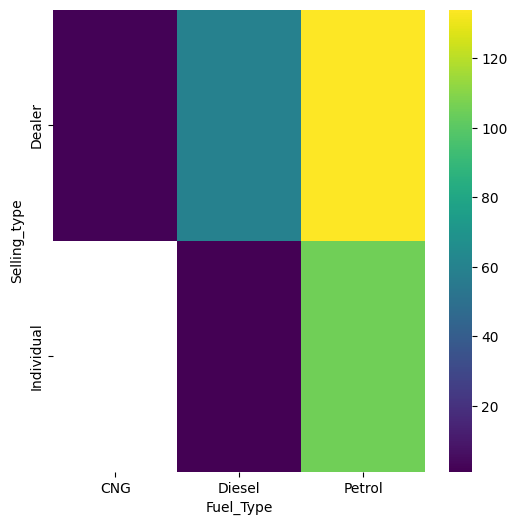

In [10]:
plt.subplots(figsize=(6, 6))
df_2dhist = pd.DataFrame({
    x_label: grp['Selling_type'].value_counts()
    for x_label, grp in df.groupby('Fuel_Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Fuel_Type')
heat_ = plt.ylabel('Selling_type')

In [11]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

# Correlation Heatmap for Car Price and Year

In this code snippet, we aim to analyze the correlation between the 'Present_Price' and 'Year' columns for each car in the dataset.

## Data Selection and Aggregation
1. We start by selecting relevant columns, including 'Car_Name', 'Year', and 'Present_Price'.
2. To avoid duplicate entries, we aggregate the data by taking the mean for entries with the same 'Car_Name' and 'Year'.

## Visualization
3. We create a heatmap using seaborn and matplotlib to visualize the correlation.
4. The `cmap` parameter is set to 'viridis' for a visually appealing color map.
5. Annotations are added to each cell of the heatmap, displaying the mean 'Present_Price' values formatted with two decial places.


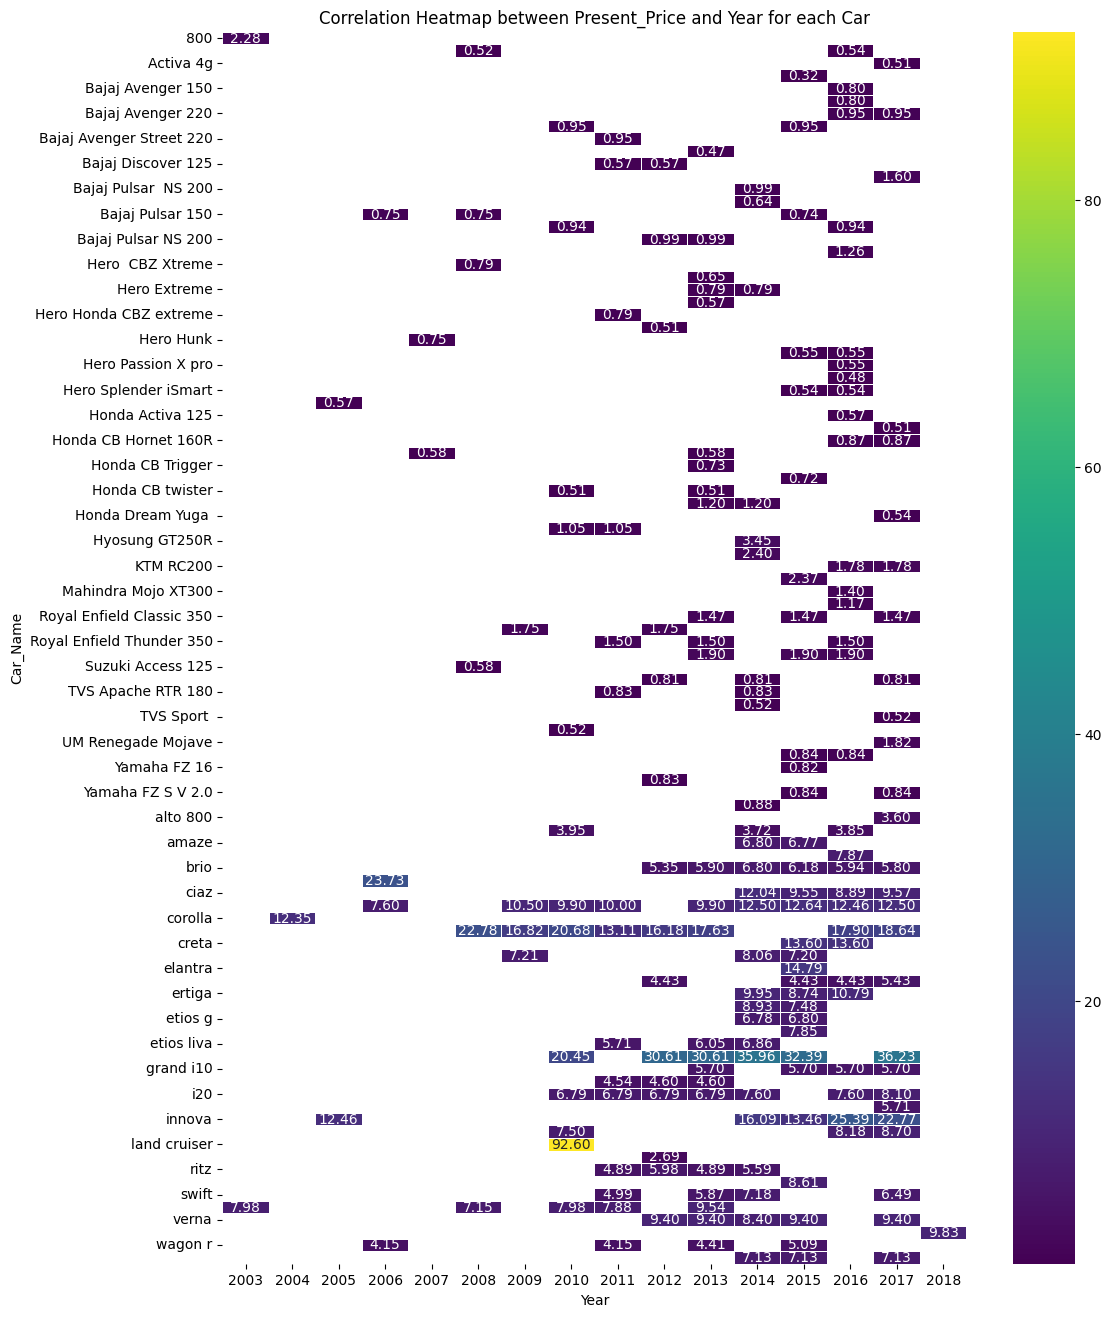

In [12]:
# Select relevant columns
selected_columns = ['Car_Name', 'Year', 'Present_Price']
df_selected = df[selected_columns]

# Aggregate data by taking the mean for duplicate entries
df_aggregated = df_selected.groupby(['Car_Name', 'Year']).mean().reset_index()
heatmap_data = df_aggregated.pivot(index='Car_Name', columns='Year', values='Present_Price')

plt.figure(figsize=(12, 16))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Present_Price and Year for each Car')
plt.show()

In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [14]:
df_ = df[['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission']]
df_

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual


<!DOCTYPE html>
<html>

<head>
  <style>
    body {
      font-family: "Helvetica", sans-serif;
      color: #333;
      max-width: 800px;
      margin: auto;
      line-height: 1.6;
    }

    h2 {
      color: #336699;
    }

    h3 {
      color: #336699;
    }

    h4 {
      color: #336699;
    }

    ul {
      list-style-type: none;
      padding: 0;
    }

    li {
      margin-bottom: 10px;
    }
  </style>
</head>
<body>
  <h2>Interactive Widget for Selecting Current Year</h2>
  <p>In this code snippet, an interactive widget is created using the <code>ipywidgets</code> library to allow users to input the current year. Additionally, a button is provided to confirm the selected year.</p>
  <h3>Current Year Widget</h3>
  <ul>
    <li>The widget is created using <code>widgets.IntText</code> to accept an integer input for the current year.</li>
    <li>The default value is set to 2018, which can be adjusted based on the dataset used.</li>
  </ul>
  <h3>Confirm Year Button</h3>
  <ul>
    <li>A button widget, labeled "Confirm Year," is created using <code>widgets.Button</code>.</li>
  </ul>
  <h3>Confirm Year Function</h3>
  <ul>
    <li>A function, <code>confirm_year</code>, is defined to capture and display the selected current year when the button is clicked.</li>
  </ul>
  <h3>Image</h3>
  <ul>
    <li>An image is added for visual appeal using the Markdown syntax.</li>
  </ul>
  <img src="https://github.com/kazuha-alice/OIBSIP/blob/main/img/button.png" alt="Button Image" style="width:150px;height:50px;">
</body>
</html>

In [15]:
import ipywidgets as widgets
from IPython.display import display

# Create an interactive widget for entering the year
currentYear_widget = widgets.IntText(
    value=2018,  # Set a default value based on cardata.csv
    description='Current Year:',
    style={'description_width': 'initial', 'color': 'blue'},
)

# Create a button widget for confirming the selected year
confirm_button = widgets.Button(description='Confirm Year', button_style='primary')

def confirm_year(button):
    global currentYear
    currentYear = currentYear_widget.value
    print(f"Selected Current Year: {currentYear}")
    
confirm_button.on_click(confirm_year)
display(currentYear_widget)
display(confirm_button)

IntText(value=2018, description='Current Year:', style=DescriptionStyle(description_width='initial'))

Button(button_style='primary', description='Confirm Year', style=ButtonStyle())

In [16]:
print(currentYear) # To check current year

2023


In [17]:
df_['Car_Age'] = currentYear - df_['Year']
df_

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,9
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,7
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,8
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,14
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,6


In [18]:
df_.drop(['Year'], axis = 1)

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,9
...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,7
297,4.00,5.90,60000,Petrol,Dealer,Manual,8
298,3.35,11.00,87934,Petrol,Dealer,Manual,14
299,11.50,12.50,9000,Diesel,Dealer,Manual,6


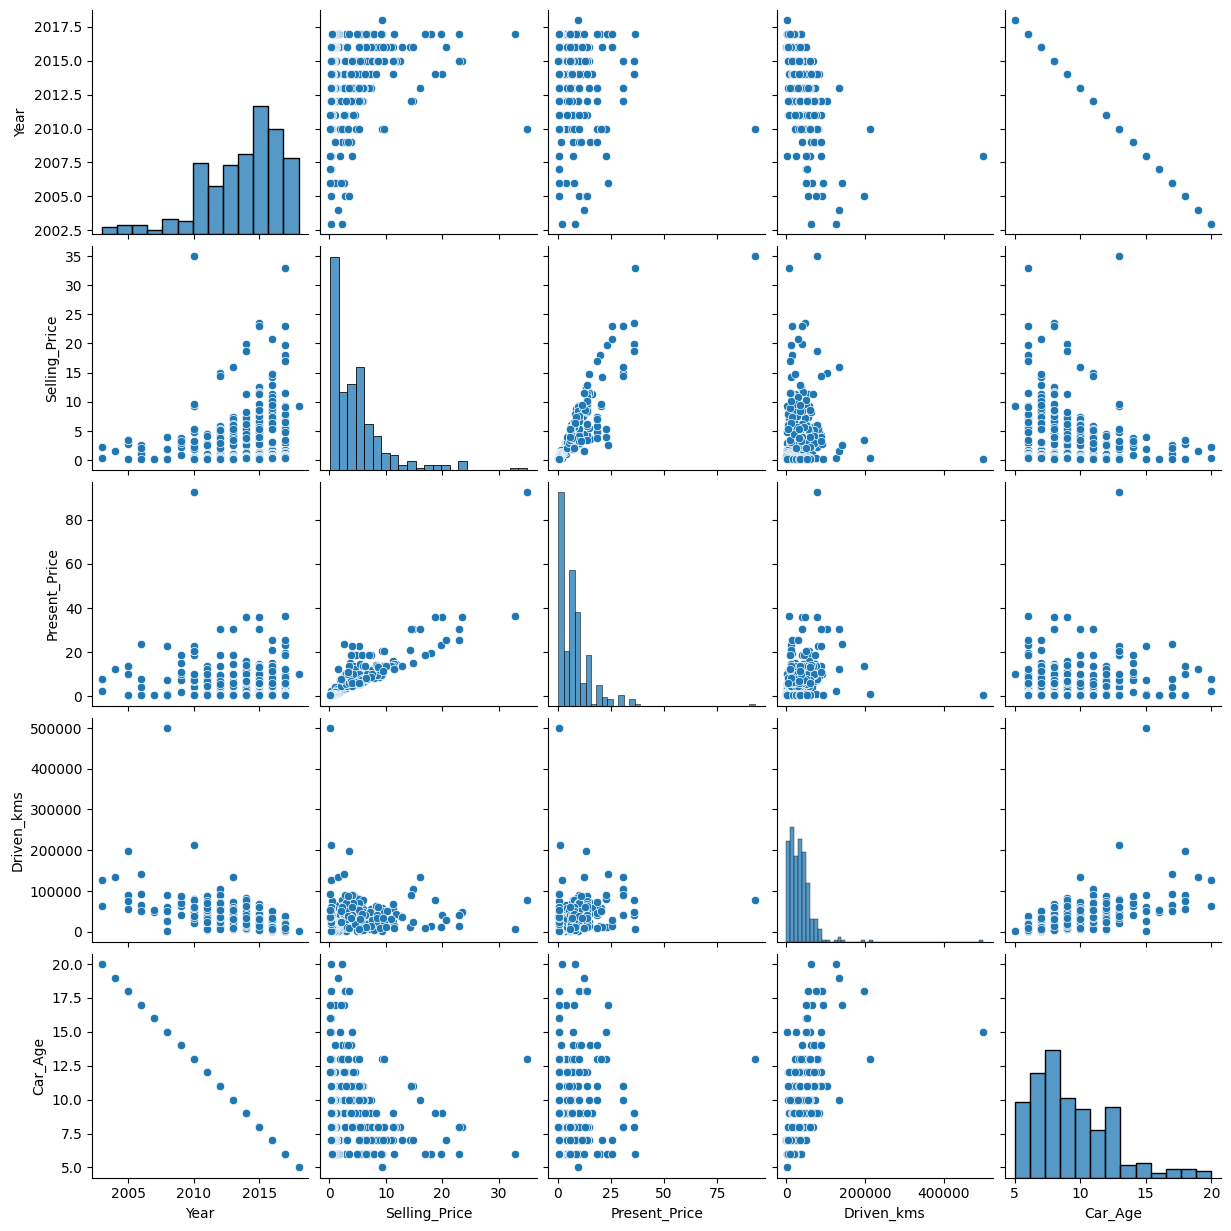

In [19]:
sns.pairplot(df_, diag_kind="hist") # Pair-plot

In [20]:
df__ = df[['Car_Name','Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission']]
df__['Car_Age'] = df_[['Car_Age']]
df__head = df__.head(21)
# Apply a style to format the display
styled3_df = df__head.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', 'lightgrey')]},
    {'selector': 'tbody td', 'props': [('border', '1px solid black')]},
])
styled3_df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Car_Age
0,ritz,2014,3.350000,5.590000,27000,Petrol,Dealer,Manual,9
1,sx4,2013,4.750000,9.540000,43000,Diesel,Dealer,Manual,10
2,ciaz,2017,7.250000,9.850000,6900,Petrol,Dealer,Manual,6
3,wagon r,2011,2.850000,4.150000,5200,Petrol,Dealer,Manual,12
4,swift,2014,4.600000,6.870000,42450,Diesel,Dealer,Manual,9
5,vitara brezza,2018,9.250000,9.830000,2071,Diesel,Dealer,Manual,5
6,ciaz,2015,6.750000,8.120000,18796,Petrol,Dealer,Manual,8
7,s cross,2015,6.500000,8.610000,33429,Diesel,Dealer,Manual,8
8,ciaz,2016,8.750000,8.890000,20273,Diesel,Dealer,Manual,7
9,ciaz,2015,7.450000,8.920000,42367,Diesel,Dealer,Manual,8


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [22]:
# Select features and the target variable
features = ['Car_Name','Year','Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Car_Age']
target = 'Selling_Price'

In [23]:
X = df__[features]
Y = df__[target]

In [24]:
# Clean up leading and trailing spaces in 'Car_Name'
X['Car_Name'] = X['Car_Name'].str.strip()

In [25]:
# Label encoding for 'Car_Name'
label_encoder = LabelEncoder()
X['Car_Name'] = label_encoder.fit_transform(X['Car_Name'])

In [26]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [27]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [28]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=100)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=100)

In [29]:
# Predict from the test dataset
predictions = rf_regressor.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

In [30]:
print("Mean Squared Error:", mse)

Mean Squared Error: 4.363156740879121


In [31]:
print("R^2 Score:", r2)

R^2 Score: 0.8327571650755496


<Axes: xlabel='Selling_Price', ylabel='Density'>

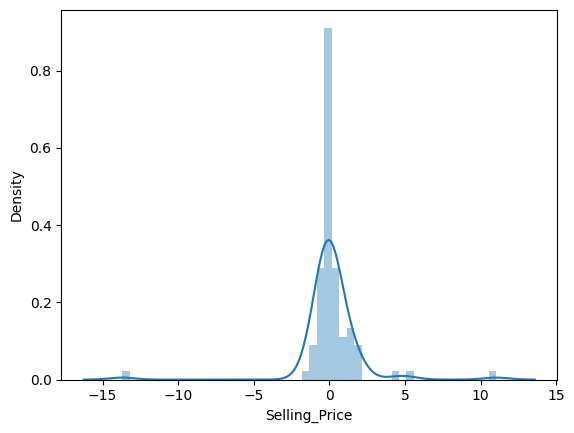

In [32]:
sns.distplot(Y_test-predictions)

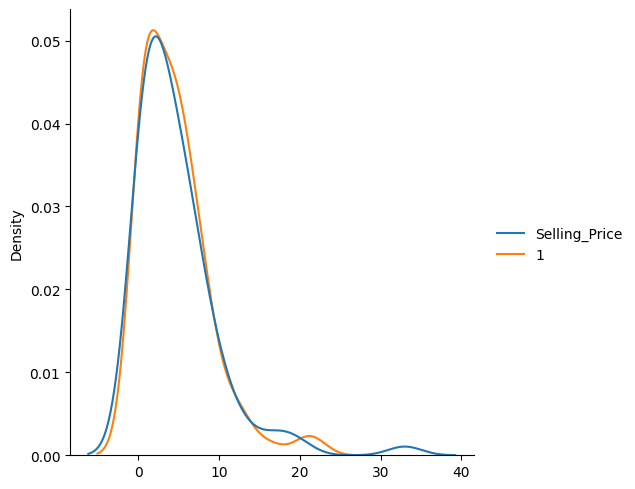

In [33]:
sns.displot((Y_test,predictions), kind="kde")

<Axes: >

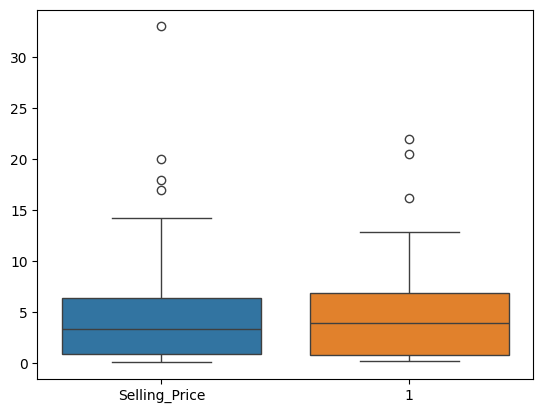

In [34]:
sns.boxplot((Y_test,predictions))

In [35]:
import joblib

# Save the model to a file
model_filename = r'D:\GitHUb\OIBSIP\Data_Science\ℂ𝕒𝕣ℙ𝕣𝕚𝕔𝕖ℙ𝕣𝕖𝕕𝕚𝕜𝕚𝕠𝕟\carPricePrediction.joblib'
joblib.dump(rf_regressor, model_filename)

print(f"Model saved to {model_filename}")

Model saved to D:\GitHUb\OIBSIP\Data_Science\ℂ𝕒𝕣ℙ𝕣𝕚𝕔𝕖ℙ𝕣𝕖𝕕𝕚𝕜𝕚𝕠𝕟\carPricePrediction.joblib


In [36]:
loaded_model = joblib.load(model_filename)

# Now loaded_model can be used for predictions
predictions = loaded_model.predict(X_test)

In [37]:
loaded_model

RandomForestRegressor(random_state=100)

In [38]:
predictions

array([ 0.2054,  2.5199,  1.164 ,  1.0732,  3.2395,  4.768 ,  5.0335,
        3.1671,  0.589 ,  3.515 ,  0.4084,  5.1207,  7.2366,  3.6905,
        1.413 ,  6.9906, 16.1892,  0.2185,  7.483 ,  1.2696,  0.72  ,
        9.5752,  4.518 ,  0.4422,  7.422 ,  8.8415,  0.4577,  4.5635,
        0.5941,  0.8475,  5.9662, 12.5182,  4.674 ,  6.9755,  7.782 ,
        4.311 ,  3.7175, 12.6637,  2.8175,  6.8431,  7.483 ,  5.1996,
        5.0815,  4.6685,  2.9425,  0.4397,  0.723 ,  3.9094,  0.5896,
        2.36  , 21.9675,  1.3161,  4.164 ,  7.691 ,  5.1737,  2.0105,
        9.1418,  1.545 ,  3.323 ,  2.926 ,  0.2218,  2.615 ,  0.4915,
        5.3855, 20.4925,  0.5172,  0.2442,  5.9405,  9.0013,  0.4453,
        6.0175,  0.5614,  4.7036,  4.76  ,  6.9377,  5.9215, 11.2606,
        0.7101, 10.0551,  8.7163,  2.8955,  0.5512,  0.4159, 12.8524,
        3.937 ,  0.6408,  5.1747,  7.0535,  0.705 ,  0.7263,  2.57  ])

# Internship: Data Science
**Company:** Oasis Infobyte ~ [Oasis Infobyte Website](https://oasisinfobyte.com/)
**Topic:** 𝓒𝓪𝓻 𝓟𝓻𝓲𝓬𝓮 𝓟𝓻𝓮𝓭𝓲𝓬𝓽𝓲𝓸𝓷

## Overview
This internship project focused on 𝓒𝓪𝓻 𝓟𝓻𝓲𝓬𝓮 𝓟𝓻𝓮𝓭𝓲𝓬𝓽𝓲𝓸𝓷, exploring various aspects of data science and machine learning.

## Challenges Encountered
- <span style="color:red">Graph errors</span>
- <span style="color:red">StringType errors</span>
- <span style="color:red">Missing values</span>
- <span style="color:red">Missing libraries</span>
- <span style="color:red">And So on</span>

## Solutions
- **StackOverflow:** for general problem-solving
- **Geeks for Geeks:** for algorithmic solutions
- **YouTube Code with Harry:** for practical coding examples
- **Library Documentation:** for in-depth understanding and troubleshooting

## Widget Creation Challenge
While working on the project, I attempted to create interactive widgets but faced difficulties in the process. This was a new concept for me, and I tried to find a solution, but it remained elusive.

## Source Links
Here are some valuable source links that contributed to problem-solving and project development:
- [Matplotlib Timeline Example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html#sphx-glr-gallery-lines-bars-and-markers-timeline-py)
- [Matplotlib Widgets Gallery](https://matplotlib.org/stable/gallery/widgets/index.html)
- [Matplotlib Slider Demo](https://matplotlib.org/stable/gallery/widgets/slider_demo.html#sphx-glr-gallery-widgets-slider-demo-py)
- [ipywidgets Styling Documentation](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Styling.html)
- [Seaborn pairplot Documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
- [Pandas DataFrame Documentation](https://pandas.pydata.org/docs/reference/frame.html)
- [Matplotlib Pie Chart Documentation](https://matplotlib.org/stable/api/_as_genmatplotlib.axes.Axes.pie.html)


In [39]:
# Above Code I Try to create widget and failed try to find solution but couldn't able to find

In [40]:
# import ipywidgets as widgets
# from IPython.display import display

# Load the trained model
# rf_regressor = joblib.load(model_filename)

In [41]:
'''```
# Function to predict car prices based on selected car name and sliders' values
def predict_price(car_name, price):
    # Extract features for prediction
    features = df__.loc[df__['Car_Name'] == car_name, ['Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Car_Age']]
    
    # Convert categorical variables to numerical using one-hot encoding
    features = pd.get_dummies(features, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)
    
    # Ensure feature names match those seen during training
    model_features = ['Present_Price', 'Driven_kms', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual', 'Car_Age']
    
    # Add missing columns if any
    for col in model_features:
        if col not in features.columns:
            features[col] = 0
    
    features = features[model_features]
    
    # Predict the price using the trained model
    predicted_price = rf_regressor.predict(features)[0]
    
    # Display the predicted price range
    print(f"Predicted Price Range: {predicted_price - price} to {predicted_price + price}")

# Dropdown widget for selecting a car name
car_name_dropdown = widgets.Dropdown(
    options=df['Car_Name'].unique(),
    description='Car Name:',
)

# Slider for adjusting price
price_slider = widgets.FloatSlider(
    value=10,
    min=1,
    max=100,
    step=1,
    description='Price:',
    orientation='vertical',
)

# Function to update the prediction based on widget values
def update_prediction(change):
    car_name = car_name_dropdown.value
    price = price_slider.value
    predict_price(car_name, price)

# Register the update function with each widget
car_name_dropdown.observe(update_prediction, names='value')
price_slider.observe(update_prediction, names='value')

# Display the widgets
display(car_name_dropdown, price_slider)

# Initial prediction based on default values
update_prediction(None)
```'''

'```\n# Function to predict car prices based on selected car name and sliders\' values\ndef predict_price(car_name, price):\n    # Extract features for prediction\n    features = df__.loc[df__[\'Car_Name\'] == car_name, [\'Present_Price\', \'Driven_kms\', \'Fuel_Type\', \'Selling_type\', \'Transmission\', \'Car_Age\']]\n    \n    # Convert categorical variables to numerical using one-hot encoding\n    features = pd.get_dummies(features, columns=[\'Fuel_Type\', \'Selling_type\', \'Transmission\'], drop_first=True)\n    \n    # Ensure feature names match those seen during training\n    model_features = [\'Present_Price\', \'Driven_kms\', \'Fuel_Type_Diesel\', \'Fuel_Type_Petrol\', \'Selling_type_Individual\', \'Transmission_Manual\', \'Car_Age\']\n    \n    # Add missing columns if any\n    for col in model_features:\n        if col not in features.columns:\n            features[col] = 0\n    \n    features = features[model_features]\n    \n    # Predict the price using the trained model